# Lab 7: K-means Clustering in Scikit-Learn
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2020

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by Eleanor Lutz and Eliza Barkan, with helpful comments and suggestions from Bing and Kam.

### Table of Contents
1. K-means clustering using scikit-learn
2. Bonus exercises

### Helpful resources
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
- [An introduction to machine learning with Scikit-Learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Scikit-Learn user guide](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-Learn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116) by Python for Data Science

### Data
- The data in this lab was downloaded from [Kaggle](https://www.kaggle.com/uciml/iris) (originally from [Fisher 1936](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf)) and was edited for teaching purposes. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-colorblind") # Use a colorblind friendly color scheme
%matplotlib inline

## Lab 7 Part 1: 

Today, we want to see what patterns emerge from data when we apply the unsupervised learning technique of k-means clustering. This week's data consists of measurements taken from three species of irises.
![Iris_flower_types](iris_flowers.png)

[Image Source](https://thegoodpython.com/iris-dataset/)

**To import the data:** 

**Option 1** Download and install [Anaconda Navigator](https://www.anaconda.com/distribution/) to use an Anaconda Jupyter notebook. It works just like Google Colaboratory but you can much more easily import files directly from your local computer.

**Option 2** Access files from Google Drive (using Google Colaboratory)
1. Put files Iris.csv on your Google Drive
2. Mount drive by selecting the file icon on the left and selecting "Mount Drive"
3. Run the cell it creates and follow the links to get access to files on your Google Drive
4. In a new cell, use "cd" (change directory) to go into a directory (aka a folder) or "ls" to see what is in the directory (aka a folder) that you are currently in. Continue using cd/ls to get to the folder on your Google Drive that contains these two csv files. If you get stuck, you can use "cd .." to go backwards.
5. You may then continue with the lab, starting with running pd.read_csv(filename)

**Option 3** Open files from your local file system (using Google Colaboratory)
1. Select <> icon above the file icon on the left side bar. 
2. Scroll through options until you get to "Open files from your local file system," select this option and run the cell it creates. Find the files on your local computer
3. You may then continue with the lab, starting with running pd.read_csv(filename)

**Exercise 1:** Read in the `iris.csv` dataset and display the first five rows.

In [2]:
df = pd.read_csv("/Users/elizabarkan/Desktop/BIO419/labs/week7/iris_data.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Exercise 2:** Create a scatterplot of sepal length vs petal width, with each species plotted as a different color.

Hint: seaborn has an easy way to plot different colors by value in a column.

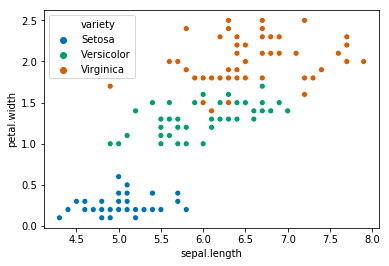

In [3]:
sns.scatterplot("sepal.length", "petal.width", hue = "variety", data = df)

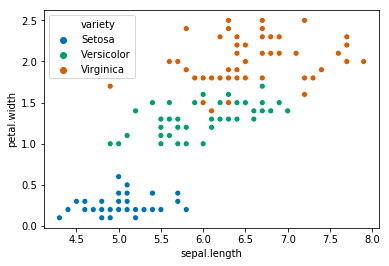

In [4]:
sns.scatterplot(df["sepal.length"], df["petal.width"], hue = df["variety"])

## K-means clustering with sci-kit learn

K-means clustering is an iterative clustering algorithm that is used to cluster unlabeled data. For example, the data you have may be unlabeled because it was collected by someone else who didn't have time to label everything by hand.

- **Initialization:** First, k-means randomly chooses ${k}$ samples from the data to use as the initial cluster centers (${k}$ is the number of clusters). 
- **Cluster Assignment:** Next, each data point is assigned to the cluster center that is closest to that data point. 
- **Move centroid:** At this point each cluster center should have a set of data points associated with that cluster assignment. We will now update the cluster center to be the mean of all of the data points assigned to that cluster. 
- **Iterate:** The previous step will likely move the cluster centers. If it did, we will repeat the process again and again until the centroids no longer move after the cluster assignment step.

Below is an animation showing the steps of K-means clustering for ${k = 4}$
<img src="https://cdn-images-1.medium.com/max/800/1*4LOxZL6bFl3rXlr2uCiKlQ.gif" />

*Credit:* Andrey A. Shabalin

This is a schematic of what we will be doing today with the Iris data set for different k values. 

![Schematic](lab7_schematic.png)

To run the k-means algorithm in Scikit-learn, import `sklearn.cluster.KMeans`: 


In [ ]:
from sklearn.cluster import KMeans

First, split the dataframe into **randomly assigned** training and test data sets called `train_data` and `test_data`. 

In [ ]:
train_data = df.sample(frac=0.7)
test_data = df.drop(train_data.index)

Since `KMeans` is an unsupervised learning algorithm, the only input should be the features and not the data labels because in this lab, we want to cluster the data agnostic to what the true data labels are. 

**Exercise 3**: Remove the species descriptions from both dataframes:

Now we can use k-means clustering to fit a cluster called `cluster` to your iris data matrix with $k=2$ clusters:

In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(train_data_n)

The documentation for [Scikit-learn K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) describes what can be done after fitting this model. For example, the attribute `labels_` returns an array of the cluster ID for every data point:

In [ ]:
cluster.labels_

**Exercise 4:** Create a new column, `labels`, in the `train_data` iris data frame using the labels from the k-means model. Then plot sepal length by petal width from this dataframe with points colored by the k-means cluster labels.

Another helpful Scikit-learn method is `predict`, which uses the previously created clustering algorithm to predict the closest cluster for the given data using a **Voronoi Diagram**. We can use this to predict the cluster for a previously unseen data points from our test dataset constructed from the location of the centroids.

In [ ]:
cluster.predict(test_data_n)

Now we can compare the predicted cluster IDs to the known species names for each sample to see how well the machine learning algorithm matches the species classification.

In [ ]:
test_data['label'] = cluster.predict(test_data_n)
test_data.groupby(['variety','label']).size().reset_index(name='counts')


**Exercise 5:** Cluster your iris data again using $k=3$ clusters. After clustering, replace your original cluster labels in `train_data` with the new labels and plot sepal length by petal width (scatterpoints colored by cluster label). 

**Exercise 6:** Use this new cluster to predict the cluster ID of the test data. Display the number of samples that belong to each cluster-species group. Does it seem like there is one species that clusters better than the others? 

**Exercise 7:** Cluster only the `sepal.length` and `petal.width` of the iris data matrix into $k=3$ clusters. Display the first five rows of the training dataset. Repeat the plot above. How do the results change with fewer dimensions for the model?

In [ ]:
train_data_n2 = train_data.drop(["sepal.width", "petal.length", "variety", "labels"], axis=1) # drop columns we do not 
# want to use in the clustering
display(train_data_n2.head())

### YOUR CODE HERE


## Lab 7 Bonus exercise

**Bonus Exercise 1:** Visualize the success of the clustering algorithm compared to the true species values. Plot the sepal length and petal width in a scatterpoint colored according to species, and the clustering results should be represented by different marker shapes (circle, X, diamond, etc).